In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets

In [2]:
outliers = 400

# Generate random regression problem
x, y, coef = datasets.make_regression(
    n_samples = 1000,
    n_features = 1,
    n_informative = 1,
    noise = 10,
    coef = True,
    random_state = 0,
)

In [3]:
np.random.seed(0)
x[:outliers] = 0.5 * np.random.normal(size=(outliers,1))
y[:outliers] = -100 + 100 * np.random.normal(size=outliers)

In [4]:
ransac = linear_model.RANSACRegressor()
ransac.fit(x, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask) # duh

In [5]:
line_x = np.arange(x.min(), x.max())[:, np.newaxis]
line_y_ransac = ransac.predict(line_x)

print(f"Estimated coefficients:\n\n Initial: [{coef}]\n RANSAC: {ransac.estimator_.coef_}")

Estimated coefficients:

 Initial: [82.1903908407869]
 RANSAC: [82.03020617]


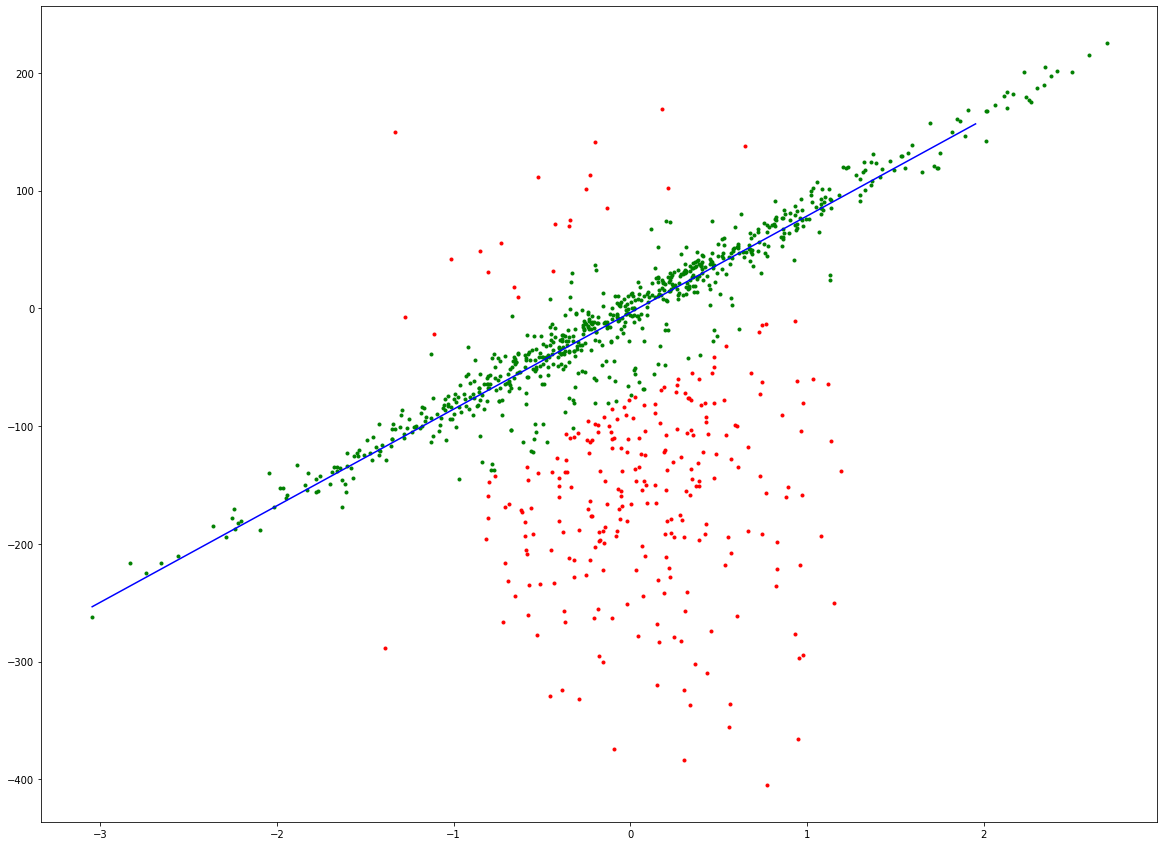

In [6]:
# Blue - orginal, green - inliers, yellow - outliers
plot = plt.figure(figsize=[20, 15])
plt.scatter(x[inlier_mask], y[inlier_mask], color="green", marker=".")
plt.scatter(x[outlier_mask], y[outlier_mask], color="red", marker=".")
plt.plot(line_x, line_y_ransac, color="blue")
plt.show()
#fun fact - if there is e.g. 500 outliers and 1000 inliers RANSAC MAY think that that line in corner is actually correct